In [55]:
def make_plots(output_dict, stencils):
    keys = list(output_dict.keys())
    keys.remove('filename')
    keys.remove('curvature')
    for key in keys:
        # Make figure without border
        # '''
        fig = plt.figure(frameon=False)
        ax = plt.Axes(fig, [0., 0., 1., 1.])
        fig.add_axes(ax)
        '''
        fig, ax = plt.subplots()
        # '''

        # print(key)
        if key != 'ellipse':
            fig.set_size_inches(stencils[1],stencils[0])
            # ax.get_xaxis().set_visible(False)
            # ax.get_yaxis().set_visible(False)
            if 'unverschmiert' in key:
                image = output_dict[key][1:-1, 1:-1]
            else:
                image = output_dict[key]
            
            if key == 'image':
                ax.set_xticks(np.arange(-0.5, int((stencils[1]-1)*100), 100))
                ax.set_yticks(np.arange(-0.5, int((stencils[1]-1)*100), 100))
            else:
                ax.set_xticks(np.arange(-0.5, stencils[1]-1, 1))
                ax.set_yticks(np.arange(-0.5, stencils[0]-1, 1))
                
            ax.grid(color='gray', linestyle='-', linewidth=1, which='major')
            plt.imshow(image, cmap='Greys_r')
            
            if key == 'unverschmiert_val':
                for i in range(stencils[0]):
                    for j in range(stencils[1]):
                        ax.text(j, i,
                                f'${np.round(output_dict[key][1:-1, 1:-1][i, j],3)}$',
                                color=('w' if (output_dict[key][1:-1, 1:-1][i, j] < 0.5) else 'k'),
                                horizontalalignment='center', 
                                verticalalignment='center',
                                size = 24,
                               )
            if key == 'verschmiert_val':
                for i in range(stencils[0]):
                    for j in range(stencils[1]):
                        ax.text(j, i,
                                f'${np.round(output_dict[key][i, j],3)}$',
                                color=('w' if (output_dict[key][i, j] < 0.5) else 'k'),
                                horizontalalignment='center', 
                                verticalalignment='center',
                                size = 24,
                               )
        else:
            [x_plt, y_plt, x] = output_dict[key]
            ax.set_facecolor('k')
            # Plot ellipse
            ax.fill(x_plt, y_plt, color='w', zorder=-1)
            # Plot point [y, x]
            ax.scatter(x[1], x[0], color='r', s = 50)
            ax.set_facecolor('k')
            # Print radius 
            # ax.text(0.5, 0.5, f'r = {np.round(r,3)}\nk = {np.round(curvature,3)}', transform=ax1.transAxes, color='k', ha='center')
            # Make axis equally long
            # ax.set_xlim([-0.5, 0.5])
            # ax.set_ylim([-0.5, 0.5])
            ax.set_aspect('equal')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            # plt.axis('off')


        filename = key
        ftype = 'png'
        path = os.path.join('/Users', 'zach', 'Desktop', 'Grafiken', output_dict['filename']+'_' +filename+'.'+ftype)
        # plt.savefig(path, format='svg', )
        plt.savefig(path, format=ftype, dpi=150)
        # plt.show()

In [56]:
# %%capture
plt.ioff()
np.set_printoptions(suppress=True, linewidth=np.infty, threshold=np.infty)
matplotlib.rcParams['mathtext.fontset'] = 'stix'

N_values = 1
# stencils = [11, 15]
st = [[7, 7], [11, 15]]
# st = [[7, 7]]
ek = True
neg = True
silent = True
geometry = 'ellipse'
smearing = True
usenormal = False
dshift = 0
interpolate = 0
gauss = True
seeds = [1, 2, 3, 4]
# seeds = [1]
plot = False
x_c = [0, 0]

for stencils in st:
    for seed in seeds:
        output_dict = generate_data(N_values=N_values, stencils=stencils, ek=ek, neg=neg, silent=silent, geometry=geometry, smearing=smearing, usenormal=usenormal, dshift=dshift, interpolate=interpolate, gauss=gauss, seed=seed, plot=plot, x_c=x_c)
        output_dict['unverschmiert_val'] = output_dict['unverschmiert']
        output_dict['verschmiert_val'] = output_dict['verschmiert']
        plt.close()
        output_dict['filename'] = 'file'+str(seed)+'_'+str(stencils[0])+'x'+str(stencils[1])
        make_plots(output_dict, stencils)
        print(f'seed:\t{seed}, curvature:\t{output_dict["curvature"]:.3f}')


1
seed:	1, curvature:	-0.238
1
seed:	2, curvature:	-0.249
1
seed:	3, curvature:	-0.315
1
seed:	4, curvature:	-0.553
1
seed:	1, curvature:	-0.238
1
seed:	2, curvature:	-0.249
1
seed:	3, curvature:	-0.315
1
seed:	4, curvature:	-0.553


1


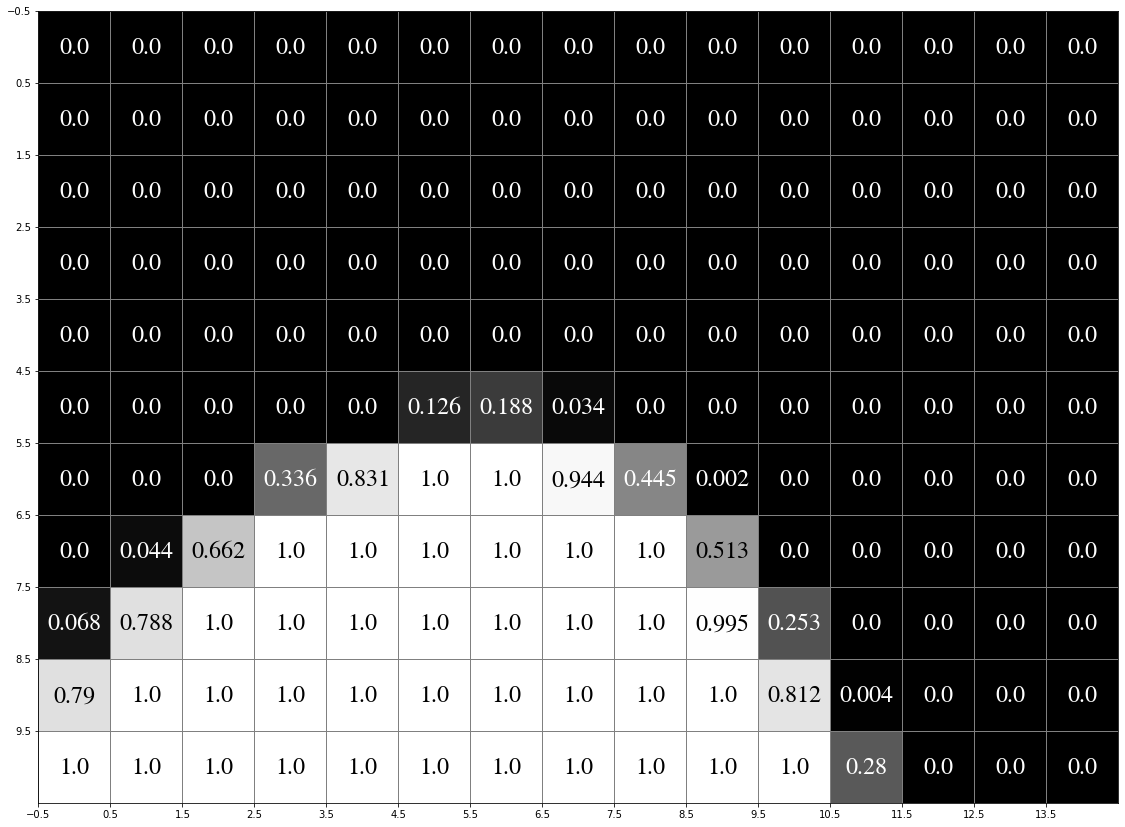

In [38]:

output_dict = generate_data(N_values=N_values, stencils=stencils, ek=ek, neg=neg, silent=silent, geometry=geometry, smearing=smearing, usenormal=usenormal, dshift=dshift, interpolate=interpolate, gauss=gauss, seed=seed, plot=plot, x_c=x_c)
output_dict['filename'] = 'file'+str(seed)+'_'+str(stencils[0])+'x'+str(stencils[1])
plt.close()
matplotlib.rcParams['mathtext.fontset'] = 'stix'

fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
fig.add_axes(ax)
fig.set_size_inches(stencils[1],stencils[0])
# ax.get_xaxis().set_visible(False)
# ax.get_yaxis().set_visible(False)
key = 'unverschmiert'
# ax.get_xaxis().set_visible(False)
# ax.get_yaxis().set_visible(False)
if key == 'unverschmiert':
    image = output_dict[key][1:-1, 1:-1]
else:
    image = output_dict[key]

if key == 'image':
    ax.set_xticks(np.arange(-0.5, int((stencils[1]-1)*100), 100))
    ax.set_yticks(np.arange(-0.5, int((stencils[1]-1)*100), 100))
else:
    ax.set_xticks(np.arange(-0.5, stencils[1]-1, 1))
    ax.set_yticks(np.arange(-0.5, stencils[0]-1, 1))

for i in range(stencils[0]):
    for j in range(stencils[1]):
        ax.text(j, i,
                f'${np.round(output_dict[key][1:-1, 1:-1][i, j],3)}$',
                color=('w' if (output_dict[key][1:-1, 1:-1][i, j] < 0.5) else 'k'),
                horizontalalignment='center', 
                verticalalignment='center',
                size = 24,
               )
        # ax.text(i, j, f'kappa = {np.round(1,3)}', transform=ax.transAxes, color='w')


ax.grid(color='gray', linestyle='-', linewidth=1, which='major')
plt.imshow(image, cmap='Greys_r') 
plt.show()

In [35]:
import numpy as np
import itertools
import time
import pandas as pd
from progressbar import *
import matplotlib.pyplot as plt
import os
import sys
import math
import matplotlib
from scipy.optimize import fsolve

from src.d.utils import (
    gt,
    plot_circle,
    plot_ellipse,
    plot_sinus,
    plot_vof,
    u,
    pm,
)


def axismatrix(n_grid, axis):
    # Generate matrix where values increase along the given axis starting at 0
    n_grid = int(n_grid)
    return_matrix = np.tile(np.array(range(n_grid))/n_grid, (n_grid, 1))
    if axis == 0:
        return return_matrix.transpose((1, 0))[::-1]
    elif axis == 1:
        return return_matrix

def cross(mid_pt, max_pt, rev_y=False):
    # Generate cross values mid_pt - max_pt to mid_pt + max_pt in both axis
    # Generate points in direction of both axis

    # rev_y: reverse order in y-direction (required for cross_point_origins)
    if rev_y:
        # First take negative y values to get sorting right
        mid_pt = [-mid_pt[0], mid_pt[1]]

    # Get limits in x-direction
    points_x = np.array([np.array([mid_pt[0]]), mid_pt[1]+max_pt[1]], dtype=object)
    # Get limits in y-direction
    points_y = np.array([mid_pt[0]+max_pt[0], np.array([mid_pt[1]])], dtype=object)
    # Get points in x- and y-direction
    cr_x = np.array(list(itertools.product(*points_x)))
    cr_y = np.array(list(itertools.product(*points_y)))
    # Combine them into a list
    cross_points = np.unique(np.concatenate((cr_y, cr_x), axis=0), axis=0)

    if rev_y:
        # Now invert y values again and transpose it to original shape: np.array().transpose((1, 0))
        cross_points = np.array([-cross_points[:, 0], cross_points[:, 1]]).transpose((1, 0))

    # Get list of all unique cross points
    return cross_points


def generate_data(N_values, stencils, ek, neg, silent, geometry, smearing, usenormal, dshift, interpolate, gauss, seed, plot, **kwargs):
    # print(f'Generating data:\nGeometry:\t{geometry}\nStencil:\t{stencils}\nKappa:\t\t{ek}\nNeg. Values\t{neg}\nN_values:\t{int(N_values)}\nSmearing:\t{smearing}')
    output_dict = {}

    # Script
    N_values = int(N_values)
    # visualize = True if (N_values == 1) else False
    visualize = plot
    debug = False

    # Grid
    Delta = 1/1000
    Delta_vof = 1/100
    L = 1

    # Stencil
    st_sz = stencils   # y, x
    cr_sz = [3, 3]  # y, x
    if smearing:
        # Increase stencil size by two until smearing is applied
        st_sz = np.add(st_sz, [2, 2])
        sm_it = (int(np.ceil(interpolate)) if interpolate else 1)
        if interpolate:
            for i in range(sm_it-1):
                # Increase stencil size by another two to make up for smearing
                st_sz = np.add(st_sz, [2, 2])

    # Geometry
    # st_sz_kappa = min(max(st_sz), 7)  # 9 for +/- 0.44
    st_sz_kappa = 7
    R_min = st_sz_kappa/2*Delta
    R_max = 0.5

    # kappa_min = L*Delta*2/R_max
    kappa_min = 1e-5
    kappa_max = L*Delta*2/R_min
    equal_kappa = ek
    
    # Limits of side ratio of ellipse
    e_min = 1.0000001
    e_max = 10
    
    # Limits of sinus frequency
    f_min = 30
    f_max = 150

    # Calculate midpoints of stencil and cross
    st_mid = [int((st_sz[0]-1)/2), int((st_sz[1]-1)/2)]
    cr_mid = [int((cr_sz[0]-1)/2), int((cr_sz[1]-1)/2)]

    # Generate x and y for origins of local grid for cross points relative to local point
    st_crp = np.array([np.arange(-cr_mid[0], (cr_mid[0]+1)),
                       np.arange(-cr_mid[1], (cr_mid[1]+1))], dtype=object)*Delta
    # Generate x and y for origins of local grid for stencils points relative to local point
    st_stp = np.array([np.arange(-st_mid[0], (st_mid[0]+1)),
                       np.arange(-st_mid[1], (st_mid[1]+1))], dtype=object)*Delta
    # Generate local grid (y from bottom to top, x from left to right)
    local_grid = np.array([axismatrix(1/Delta_vof, 0),
                           axismatrix(1/Delta_vof, 1)], dtype=object)*Delta

    # Initialize list for output vectors
    output_list = []
     
    for n in range(N_values):
        ''' Get random curvature and radius '''
        if geometry == 'sinus':
            curvature = -(kappa_min + u(seed=seed)*(kappa_max - kappa_min))
            # Get random frequency
            f = f_min + u(seed=seed)*(f_max - f_min)  # bigger f -> more of sinus 'wobble' visible
            # Get random amplitude
            a_limit = -curvature/(2*L*Delta*f**2*np.pi**2)  # min a so curvature can be found on curve
            a_min = a_limit
            a_max = 2*a_limit
            a = a_min + u(seed=seed)*(a_max - a_min)

        elif geometry == 'ellipse':
            # Get random curvature
            curvature = -(kappa_min + u(seed=seed)*(kappa_max - kappa_min))
            # Get random side ratio
            # e_max = e_maxmax + (curvature/(-kappa_max))**0.5*(e_maxmin - e_maxmax)
            # e_max = 2
            e = e_min+(u(seed=seed)**1)*(e_max-e_min)  # Bei e15 war der Exponent hier 1.5
            # Calculate geometry radius
            # r = -L*Delta*2/curvature*e**(-1 +(curvature/(-kappa_max)) + (3-(curvature/(-kappa_max)))*u(seed=seed)**1.5)
            # '''
            r_min = max([2*L*Delta/(-curvature*e), (st_sz_kappa*Delta*e**2)/2])
            r_max = 2*e**2*L*Delta/(-curvature)
            r = r_min + u(seed=seed)**1* (r_max - r_min)
            # '''
            # r = -L*Delta*2/curvature*e**(-1 +(curvature/(-kappa_max)) + (3-(curvature/(-kappa_max)))*u(seed=seed)**1.5)
        elif geometry == 'circle':
            # Get random curvature
            curvature = -(kappa_min + u(seed=seed)*(kappa_max - kappa_min))
            # Calculate radius
            r = -L*Delta*2/curvature
        output_dict['curvature'] = curvature

        # Move midpoint by random amount inside one cell
        if not 'x_c' in kwargs:
            x_c = np.array([u(seed=seed), u(seed=seed)])*Delta
        else:
            x_c = np.array(kwargs['x_c'])*Delta

        ''' Get random point on geometry '''
        if geometry == 'sinus':
            '''
            # Get random x 
            pt_x = 0 + u(seed=seed)*2/f
            # Get corresponding y
            pt_y = a*np.sin(f*np.pi*pt_x)
            # Calculate curvature 
            curvature = -2*L*Delta*(f**2*np.pi**2*pt_y)/(((a*f*np.pi)**2*(np.cos(f*np.pi*pt_x))**2+1)**(3/2))
            # '''
            # > Find approximation of x where the sine wave has the given curvature, then find the exact y value and the exact curvature
            # Solve equation for x
            func = lambda x_sol: curvature -2*L*Delta*(f**2*np.pi**2*a*np.sin(f*np.pi*x_sol))/(((a*f*np.pi)**2*(np.cos(f*np.pi*x_sol))**2+1)**(3/2))
            # With initial guess
            x_initial_guess = np.pi/(f*2)
            # Approximate x
            pt_x = fsolve(func, x_initial_guess, xtol=1e-4)[0]
            # Calculate corresponding y
            pt_y = a*np.sin(f*np.pi*pt_x)
            # Calculate actual curvature of x/y
            curvature = 2*L*Delta*(f**2*np.pi**2*pt_y)/(((a*f*np.pi)**2*(np.cos(f*np.pi*pt_x))**2+1)**(3/2))

            # Rotate with random angle
            rot = u(seed=seed)*2*np.pi
            rot_matrix = [[np.cos(rot), -np.sin(rot)],
                          [np.sin(rot), np.cos(rot)]]
            [pt_x, pt_y] = np.matmul(rot_matrix, [pt_x, pt_y])

            # Make x array and add random shift of origin x_c
            x = np.array([pt_y, pt_x])
            x = x+x_c
        elif geometry == 'ellipse':
            # Get x and y coordinates of point on geometry with the given curvature
            # (and flip x and y coordinates randomly with pm)
            pt_x = pm()*np.sqrt((((-e**2*r**2*L*Delta*2)/curvature)**(2/3)-r**2)/(e**4-e**2))
            pt_y = pm()*np.sqrt(r**2-e**2*(pt_x)**2)

            # kappa = L*Delta*(-2*e**2*r**2)/(((e**4-e**2)*(pt_x)**2+r**2)**(3/2))
            # print(f'{curvature}\t{kappa}')

            # Rotate with random angle
            rot = u(seed=seed)*2*np.pi
            rot_matrix = [[np.cos(rot), -np.sin(rot)],
                          [np.sin(rot), np.cos(rot)]]
            [pt_x, pt_y] = np.matmul(rot_matrix, [pt_x, pt_y])

            # Make x array and add random shift of origin x_c
            x = np.array([pt_y, pt_x])
            x = x+x_c
        else:
            # Get random spherical angle
            theta = 2*np.pi*u(seed=seed)
            # Get cartesian coordinates on sphere surface
            x_rel = np.array([r*np.sin(theta),   # y
                              r*np.cos(theta)])  # x
            x = np.array([x_c[0]+x_rel[0],
                          x_c[1]+x_rel[1]])

        # Round point to get origin of local coordinates in global coordinates relative to geometry origin
        round_point = np.floor(x*1/(Delta*L))*Delta*L


        ''' 1. Evaluate VOF values on cross around origin to get gradient, shift along gradient '''
        # '''
        # Initialize vof_array and fill it with nan
        vof_array = np.empty((cr_sz[0], cr_sz[1]))
        vof_array[:] = np.nan

        # Create pandas dataframe to fetch shape of geometry in local coordinates
        vof_df = pd.DataFrame(index=range(cr_sz[0]), columns=range(cr_sz[1]))

        if dshift:
            # Generate cross points in x and y direction
            cross_point_origins = cross(round_point, st_crp, rev_y=True)
            cross_point_indices = cross(cr_mid, st_crp/Delta).astype(int)
            
            for idx, ill in enumerate(cross_point_indices):
                # Get origin coordinates too
                lo = cross_point_origins[idx]
                # Values of local grid relative to geometry origin
                # Local grid origin in lower left corner, x: l.t.r., y: b.t.t.
                # (!! y on global grid = local grid origins is from top to bottom!)
                [y_l, x_l] = np.array([local_grid[0] + lo[0] - x_c[0],
                                       local_grid[1] + lo[1] - x_c[1]])
                if (geometry == 'sinus') or (geometry == 'ellipse'):
                    # Rotate geometry back to calculate geometry
                    x_ltmp = x_l.copy()
                    y_ltmp = y_l.copy()
                    x_l = x_ltmp*np.cos(rot)+y_ltmp*np.sin(rot)
                    y_l = -x_ltmp*np.sin(rot)+y_ltmp*np.cos(rot)

                if geometry == 'sinus':
                    # Get radii on local grid (np.multiply way faster than np.power) y = a*sin(f pi x)
                    r_sqr = - y_l + a*np.sin(f*np.pi*x_l)
                    # Calculate 1s and 0s on local grid
                    r_area = np.where(r_sqr <= 0, 1, 0)

                elif geometry == 'ellipse':
                    # Get radii on local grid r^2 = e^2*x^2 + y^2
                    r_sqr = e**2*np.multiply(x_l, x_l) + np.multiply(y_l, y_l)
                    # Calculate 1s and 0s on local grid
                    r_area = np.where(r_sqr <= r*r, 1, 0)

                elif geometry == 'circle':
                    # Get radii on local grid r^2 = x^2 + y^2 + z^2
                    r_sqr = np.multiply(x_l, x_l) + np.multiply(y_l, y_l)
                    # Calculate 1s and 0s on local grid
                    r_area = np.where(r_sqr <= r*r, 1, 0)

                # Get VOF values by integration over local grid
                vof = np.sum(r_area)/r_area.size
                # Write vof value into stencil value array
                vof_array[ill[0], ill[1]] = vof
                # Save the r_area array (containing the shape of the geometry) for plotting
                vof_df.iloc[ill[0], ill[1]] = r_area

            # Calculate gradient with central finite difference:
            grad_y = vof_array[cr_mid[0]+1, cr_mid[1]]-vof_array[cr_mid[0]-1, cr_mid[1]]
            grad_x = vof_array[cr_mid[0], cr_mid[1]+1]-vof_array[cr_mid[0], cr_mid[1]-1]
            # Calculate normal vector
            normal = -1/np.sqrt(grad_y*grad_y+grad_x*grad_x)*np.array([grad_y, grad_x])

            # Shift round point by random amount to cover points around the interface as well
            if usenormal:
                shift_vector = normal
            else:
                shift_vector = np.array([-grad_y, -grad_x])
            shift_point = np.round(2*(u(seed=seed)-0.5), 0)  # 4 = +/-2, 2 = +/-1
            # shift_point = shift_point*(1-(curvature-kappa_min)/(kappa_max-kappa_min))  # 1 for kappa = kappa_min, 0 for kappa = kappa_max (shift anti proportional to kappa)
            round_point = round_point + shift_point*shift_vector*Delta*L
            # '''

        ''' Plot Ellipse/Circle '''
        # if visualize:
        # Initialize plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=150)
        if geometry == 'sinus':
            # Plot sinus
            plot_sinus(ax1, f, a, x, x_c, rot, curvature)
        elif geometry == 'ellipse':
            # Plot ellipse
            output_dict['ellipse'] = plot_ellipse(ax1, r, e, x, x_c, rot, curvature)
        elif geometry == 'circle':
            # Plot circle
            plot_circle(ax1, r, x_c, x)

        # Initialize new variables
        # Initialize vof_array and vof_df with stencil size
        vof_array = np.empty((st_sz[0], st_sz[1]))
        vof_array[:] = np.nan
        # Create pandas dataframe to fetch shape of geometry in local coordinates
        vof_df = pd.DataFrame(index=range(st_sz[0]), columns=range(st_sz[1]))
        # Pass on stencil values as they are
        st_stp_tmp = st_stp
        st_sz_tmp = st_sz
        st_mid_tmp = st_mid

        ''' 2. Evaluate VOF values on whole stencil '''
        # Get origins of local coordinates of stencil points
        local_origin_points = np.array([round_point[0]+st_stp_tmp[0],
                                        round_point[1]+st_stp_tmp[1]], dtype=object)
        # Get list of all origins in stencil
        local_origins = np.array(list(itertools.product(
            *[local_origin_points[0][::-1],  # [::-1] to get sorting right
              local_origin_points[1]]
        )))
        # Get list of all stencil indices combinations
        local_indices = np.array(list(itertools.product(range(st_sz_tmp[0]), range(st_sz_tmp[1]))))  # g

        # Iterate over all stencil indices combinations
        for idx, ill in enumerate(local_indices):
            # Skip values that were already calculated for the gradient (= not nan)
            if np.isnan(vof_array[ill[0], ill[1]]):
                # Get origin coordinates too
                lo = local_origins[idx]
                # Values of local grid relative to geometry origin (see above for note on order)
                [y_l, x_l] = np.array([local_grid[0] + lo[0] - x_c[0],
                                       local_grid[1] + lo[1] - x_c[1]])

                if (geometry == 'sinus') or (geometry == 'ellipse'):
                    # Rotate geometry back to calculate geometry
                    x_ltmp = x_l.copy()
                    y_ltmp = y_l.copy()
                    x_l = x_ltmp*np.cos(rot)+y_ltmp*np.sin(rot)
                    y_l = -x_ltmp*np.sin(rot)+y_ltmp*np.cos(rot)

                if geometry == 'sinus':
                    # Get radii on local grid (np.multiply way faster than np.power) y = a*sin(f pi x)
                    r_sqr = - y_l + a*np.sin(f*np.pi*x_l)
                    # Calculate 1s and 0s on local grid
                    r_area = np.where(r_sqr <= 0, 1, 0)

                elif geometry == 'ellipse':
                    # Get radii on local grid r^2 = e^2*x^2 + y^2
                    r_sqr = e**2*np.multiply(x_l, x_l) + np.multiply(y_l, y_l)
                    # Calculate 1s and 0s on local grid
                    r_area = np.where(r_sqr <= r*r, 1, 0)

                elif geometry == 'circle':
                    # Get radii on local grid r^2 = x^2 + y^2 + z^2
                    r_sqr = np.multiply(x_l, x_l) + np.multiply(y_l, y_l)
                    # Calculate 1s and 0s on local grid
                    r_area = np.where(r_sqr <= r*r, 1, 0)

                # Get VOF values by integration over local grid
                vof = np.sum(r_area)/r_area.size
                # Write vof value into stencil value array
                vof_array[ill[0], ill[1]] = vof
                # Save the r_area array for plotting
                vof_df.iloc[ill[0], ill[1]] = r_area
        output_dict['unverschmiert'] = vof_array

        # Apply smearing
        if smearing:
            # Define smearing kernel
            if gauss:
                kernel = [[1, 2, 1], [2, 4, 2], [1, 2, 1]]  # Gauß
            else:
                kernel = [[0, 1, 0], [1, 4, 1], [0, 1, 0]]  # FNB

            # Make dictionary for unsmoothed and smoothed stencils
            vof_array_dict = {0: vof_array.copy()}

            # Get random factor between 0 and interpolate. The resulting vof_array will be a linear combination of vof_array smoothed floor(a) and ceil(a) times, where the factor defining the point inbetween both that should be interpolated is a-floor(a). If interpolate = 0 smoothing should be applied once.
            # a = (interpolate*u(seed=seed) if interpolate else 1)  # between 0 and interpolate
            # a = ((0.5 + u(seed=seed)*(interpolate - 0.5)) if interpolate else 1)  # between 0.5 and interpolate
            a = ((0.25 + u(seed=seed)*(interpolate - 0.25)) if interpolate else 1)  # between 0.25 and interpolate

            for i in range(int(np.ceil(a))):
                # Attach array filled with nan to dictionary
                vof_array_dict[i+1] = vof_array.copy()
                vof_array_dict[i+1][:] = np.nan
                # Fill array with smoothed values of last array (or unsmoothed array)
                for column in range(1+i, st_sz_tmp[0]-1-i):
                    for row in range(1+i, st_sz_tmp[1]-1-i):
                        # Calculate smeared vof field: sum(weights * vof_array_slice)/sum(weights)
                        vof_array_dict[i+1][column, row] = np.sum(np.multiply(
                            kernel,
                            vof_array_dict[i][column-1:column+2, row-1:row+2]
                        ))/np.sum(kernel)

            if interpolate:
                # Cut edges of arrays. vof_smear_array_1 is stencil with smoothing kernel applied floor(a) times, vof_smear_array_2 with it applied ceil(a) times.
                vof_smear_array_1 = vof_array_dict[int(np.floor(a))][sm_it:st_sz_tmp[0]-sm_it, sm_it:st_sz_tmp[1]-sm_it]
                vof_smear_array_2 = vof_array_dict[int(np.ceil(a))][sm_it:st_sz_tmp[0]-sm_it, sm_it:st_sz_tmp[1]-sm_it]
                # Lineary interpolate between the two arrays
                vof_array = vof_smear_array_1 + (a-np.floor(a))*(vof_smear_array_2-vof_smear_array_1)
                output_dict['verschmiert1'] = vof_smear_array_1
                output_dict['verschmiert2'] = vof_smear_array_2
            else:
                # Cut edges of vof_array
                vof_array = vof_array_dict[sm_it][sm_it:st_sz_tmp[0]-sm_it, sm_it:st_sz_tmp[1]-sm_it]

            if visualize:
                # Cut vof_df too
                vof_df = vof_df.iloc[sm_it:-sm_it, sm_it:-sm_it]

            # Shrink st_sz
            st_sz_tmp = np.add(st_sz_tmp, [-2*sm_it, -2*sm_it])
            st_mid_tmp = np.add(st_mid_tmp, [-sm_it, -sm_it])
            
            factor = int(np.ceil(a))
            print(factor)
            vof_df = vof_df.iloc[factor:-factor, factor:-factor]
        output_dict['verschmiert'] = vof_array


        ''' Plot VoF field and show plot '''
        output_dict['image'] = plot_vof(ax2, vof_df, vof_array, st_sz_tmp, Delta_vof)
        '''
        if visualize:
            # Plot vof
            output_dict['image'] = plot_vof(ax2, vof_df, vof_array, st_sz_tmp, Delta_vof)
            # Show plot
            fig.tight_layout()
            plt.show()
        # '''

        ''' Invert values by 50% chance '''
        # Only proceed if data is valid (invalid = middle point of stencil does not contain interface)
        # Invalid values are created when the interface is flat and exactly between two cells
        if (vof_array[st_mid_tmp[0], st_mid_tmp[1]] > 0) & (vof_array[st_mid_tmp[0], st_mid_tmp[1]] < 1):
            if neg:
                # Invert values by 50% chance
                if u(seed=seed) > 0.5:
                    curvature = -curvature
                    vof_array = 1-vof_array
            # Reshape vof_array from mxn array to m*nx1 vector
            output_array = np.reshape(vof_array, (1, np.prod(st_sz_tmp)))[0].tolist()
            # Insert curvature value at first position
            output_array.insert(0, curvature)
            # DEBUGGING: Insert r, e, pt_x, pt_y
            if debug:
                output_array.insert(0, r)
                output_array.insert(0, e)
                output_array.insert(0, pt_y)
                output_array.insert(0, pt_x)
            # Append list to output list
            output_list.append(output_array)
        else:
            if debug:
                print(f'thrown away')
    return output_dict
    if not visualize:
        if smearing:
            # Shrink st_sz to create right filename
            st_sz = np.add(st_sz, [-2, -2])
            if interpolate:
                sm_it = int(np.ceil(interpolate))
                for i in range(sm_it-1):
                    # Increase stencil size by another two to make up for smearing
                    st_sz = np.add(st_sz, [-2, -2])
        ''' Export data to feather file '''
        # Convert output list to pandas dataframe
        output_df = pd.DataFrame(output_list)
        # Reformat column names as string and rename curvature column
        output_df.columns = output_df.columns.astype(str)
        if debug:
            output_df = output_df.rename(columns={'0':'pt_x', '1': 'pt_y', '2': 'e', '3': 'r', '4': 'curvature'})
        else:
            output_df = output_df.rename(columns={'0':'Curvature'})
        # Write output dataframe to feather file
        parent_path = os.path.dirname(os.path.abspath(sys.argv[0]))
        # Find string for geometry
        if geometry == 'ellipse':
            geom_str = '_ell'
        elif geometry == 'sinus':
            geom_str = '_sin'
        elif geometry == 'circle':
            geom_str = '_cir'
        # Create file name
        file_name = os.path.join(parent_path, 'data', 'datasets', 'data_'+str(st_sz[0])+'x'+str(st_sz[1])+('_eqk' if equal_kappa else '_eqr')+('_neg' if neg else '_pos')+geom_str+('_smr' if smearing else '_nsm')+('_shift1' if dshift else '')+('' if usenormal else 'b')+(f'_int{interpolate}' if interpolate else '')+('_g' if gauss else '')+'_eqkmax.feather')
        print(f'File:\n{file_name}')
        # Export file
        # print('NO EXPORT')
        # output_df.reset_index(drop=True).to_feather(file_name)
        # Print string with a summary
        print(f'Generated {output_df.shape[0]} tuples in {gt(time0)} with:\nGeometry:\t{geometry}\nGrid:\t\t{int(1/Delta)}x{int(1/Delta)}\nStencil size:\t{st_sz}\nVOF Grid:\t{int(1/Delta_vof)}x{int(1/Delta_vof)}\nVOF Accuracy:\t{np.round(100*Delta_vof**2,3)}%\nNeg. Values:\t{neg}\nSmearing:\t{smearing}')
